In [8]:
import pandas as pd
fish = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fish.csv')

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 확률적 경사 하강법
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter= 10, random_state= 42) # loss= 를 'log'로 지정하면 손실함수가 로지스틱으로 지정됨
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))

0.773109243697479 0.775


C:\Users\CRACKID\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [9]:
# partial_fit()을 사용하여 sc를 추가적으로 훈련
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))

0.8151260504201681 0.85


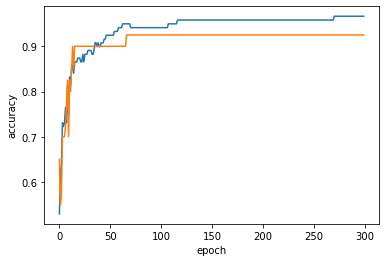

In [12]:
# 조기 종료 : 과대적합이 시작되기전에 훈련을 멈추는 것
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target) # train_target에 존재하는 7개의 생선 목록

for _ in range(300): # 300번의 에포크 훈련
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [14]:
sc =SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42) # tol=None : 멈추지 않고 max_iter만큼 반복
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))

0.957983193277311 0.925


In [15]:
# hinge 손실과 비교(SGDClassifier의 디폴트 손실값)
sc =SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42) # tol=None : 멈추지 않고 max_iter만큼 반복
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))

0.9495798319327731 0.925
